## 1. 데이터셋 출처

**Pima Indians Diabetes Database**

Predict the onset of diabetes based on diagnostic measures

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

### 1.1 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

## 2. 필요한 라이브러리 로드


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 3. 데이터셋 로드

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/diabetes.csv')

In [5]:
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 4. 학습, 예측 데이터셋 나누기

In [10]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [11]:
train = df[:split_count].copy()
print(train.shape)
test = df[split_count:].copy()
print(test.shape)

(614, 9)
(154, 9)


## 5. 학습, 예측에 사용할 컬럼

In [13]:
feature_names = train.columns[:-1].tolist()

## 6. 정답 값이자 예측해야 할 값

In [14]:
label_name = train.columns[-1]

## 7. 학습, 예측 데이터셋 만들기

In [17]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [21]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 8. 머신러닝 알고리즘 가져오기

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 0)
model

DecisionTreeClassifier(random_state=0)

## 9. 학습 (훈련)

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## 10. 예측

In [34]:
y_pred = model.predict(X_test)
y_pred[:5]

array([1, 0, 1, 0, 1])

## 11. 트리 알고리즘 분석하기

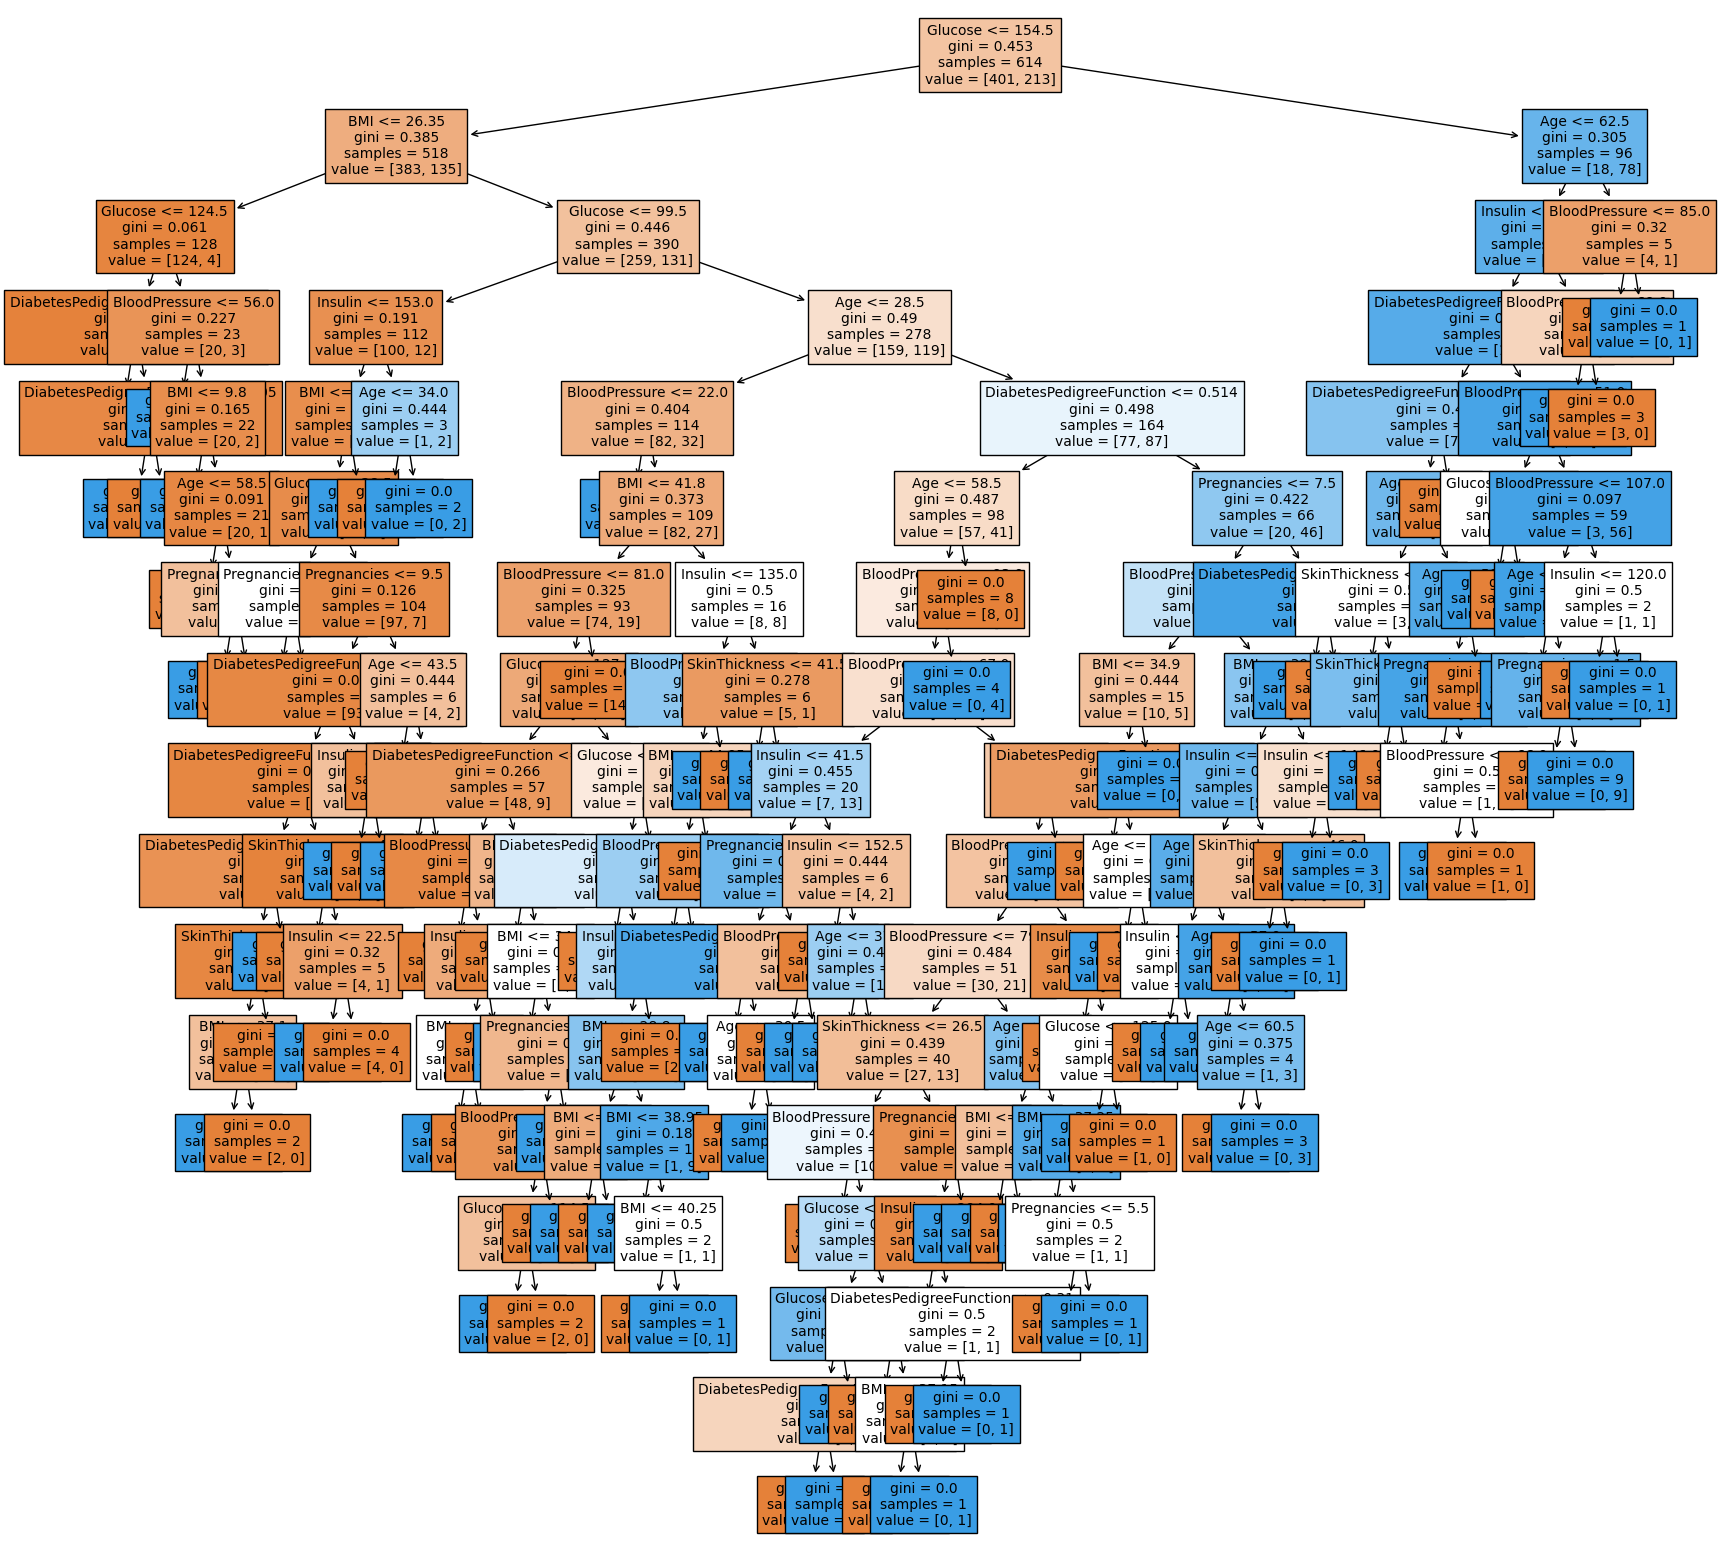

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names = feature_names,
                 filled=True, fontsize = 10)

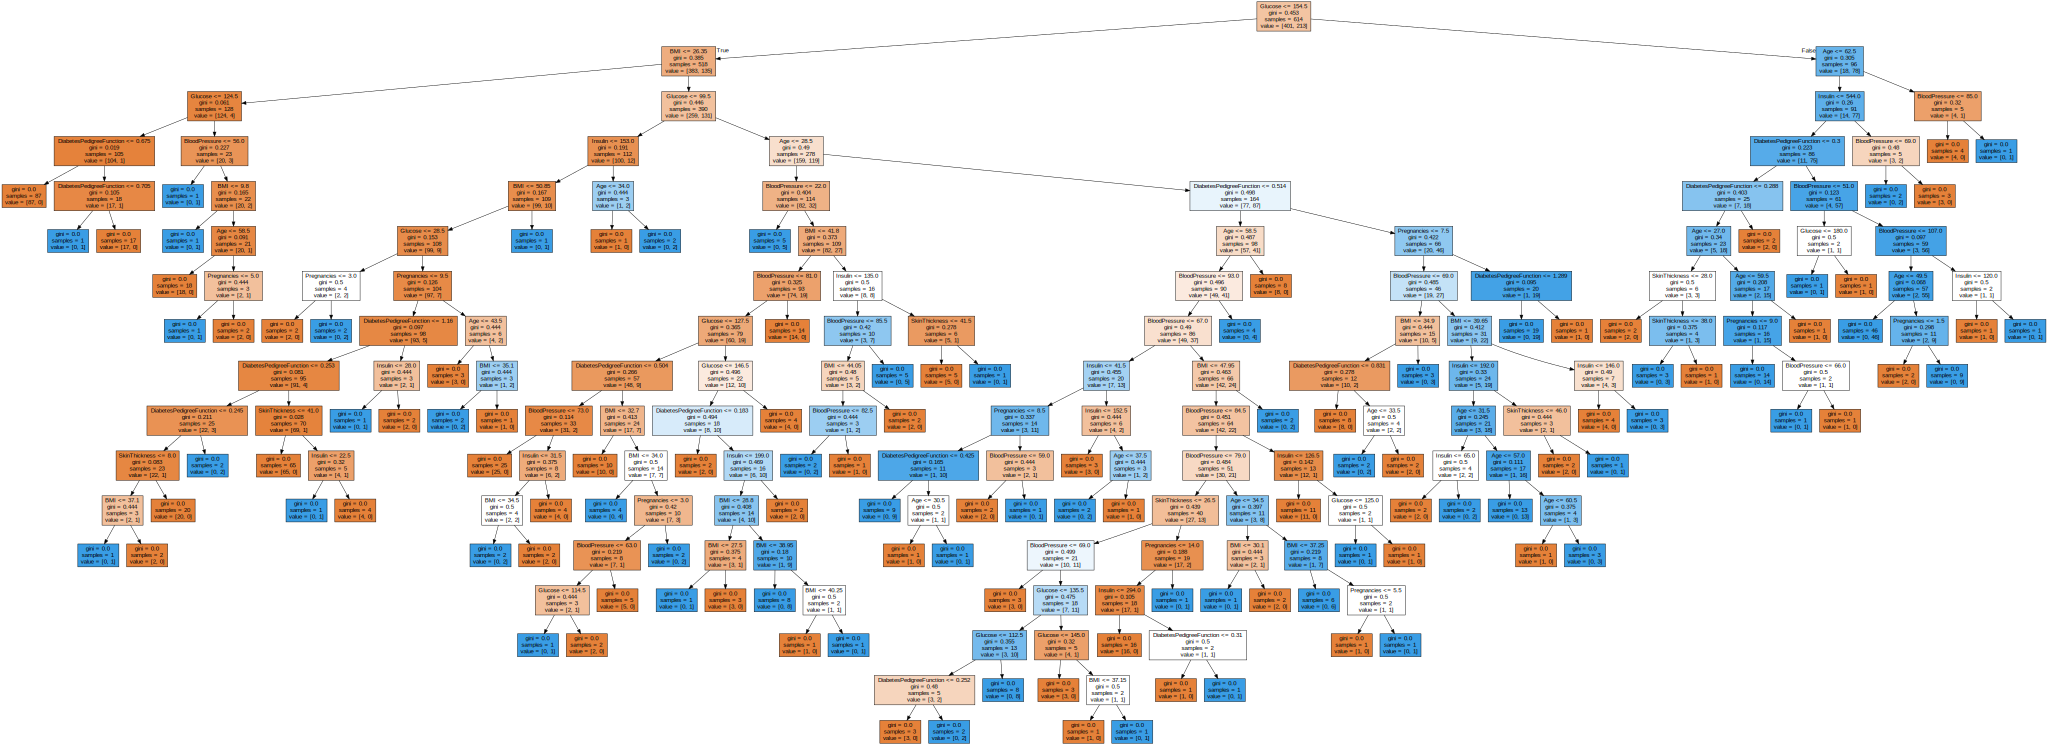

In [36]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names,
filled=True)
graphviz.Source(dot_tree)

In [37]:
model.feature_importances_

array([0.0674275 , 0.29141103, 0.12768053, 0.03754607, 0.08822288,
       0.18098284, 0.09555091, 0.11117824])

<Axes: >

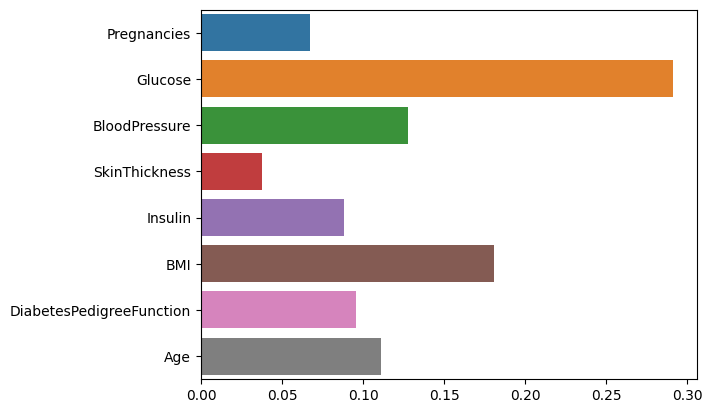

In [38]:
sns.barplot(x = model.feature_importances_, y = feature_names)

## 12. 정확도 (Accuracy) 측정하기

In [43]:
diff_count = abs(y_test - y_pred).sum()
diff_count

In [44]:
(len(y_test) - diff_count)/len(y_test) * 100

74.67532467532467

In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred) * 100

74.67532467532467

In [48]:
model.score(X_test, y_test) * 100

74.67532467532467